<a href="https://colab.research.google.com/github/jazielcarballo/ML-2025/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizacion de dataset

Clases: ['arceburgo', 'guaranesia', 'guaxupe', 'montesanto']
Cantidad de imágenes: 8


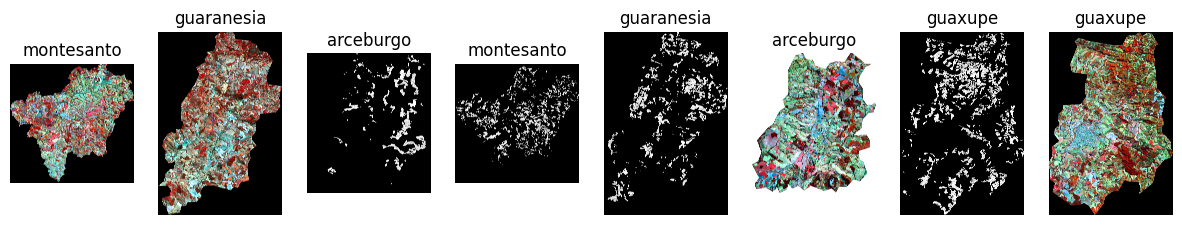

In [ ]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# Carga del dataset
dataset = load_files("/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/Dataset_without_metada", load_content=False)
file_paths = np.array(dataset['filenames'])
labels = np.array(dataset['target'])
label_names = dataset['target_names']

print("Clases:", label_names)
print("Cantidad de imágenes:", len(file_paths))

# Visualizar algunas imágenes
def show_images(file_paths, labels, label_names, n=8):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        img = cv2.imread(file_paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(label_names[labels[i]])
        plt.axis('off')
    plt.show()

show_images(file_paths, labels, label_names)

Clases: ['arceburgo', 'guaranesia', 'guaxupe', 'montesanto']
Cantidad de imágenes: 8


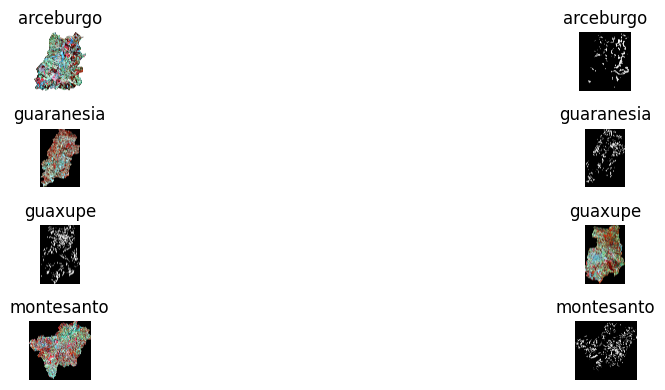

✅ Imagen guardada como: muestra_clases.png


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.datasets import load_files
import os

# Cargar dataset
dataset = load_files("/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/Dataset_without_metada", load_content=False)
file_paths = np.array(dataset['filenames'])
labels = np.array(dataset['target'])
label_names = dataset['target_names']

print("Clases:", label_names)
print("Cantidad de imágenes:", len(file_paths))

# Mostrar y guardar 2 imágenes por clase
def show_images_per_class(file_paths, labels, label_names, n_per_class=2, output_path="muestra_clases.png"):
    total_images = n_per_class * len(label_names)
    plt.figure(figsize=(n_per_class * len(label_names) * 2, 4))
    plot_idx = 1
    for class_id, class_name in enumerate(label_names):
        class_indices = np.where(labels == class_id)[0]
        selected = np.random.choice(class_indices, size=min(n_per_class, len(class_indices)), replace=False)
        for idx in selected:
            img = cv2.imread(file_paths[idx])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(label_names), n_per_class, plot_idx)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()
    print(f"✅ Imagen guardada como: {output_path}")

# Ejecutar la función
show_images_per_class(file_paths, labels, label_names, n_per_class=2)


#Preprocesamiento


In [ ]:
import os
import cv2
import csv
import numpy as np
from tqdm import tqdm

In [ ]:
# =========================
# PARÁMETROS Y RUTAS
# =========================
PATCH_SIZE = 64
THRESHOLD_COFFEE = 0.85
THRESHOLD_NONCOFFEE = 0.10

# LISTA DE IMÁGENES + MÁSCARAS
image_info_list = [
    {
        "region": "Guaranesia",
        "image_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/guaranesia/image.tif",
        "mask_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/guaranesia/mascara.tif"
    },
    {
        "region": "MonteSanto",
        "image_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/montesanto/image.tif",
        "mask_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/montesanto/mascara.tif"
    },

    {
        "region": "Guaxupe",
        "image_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/guaranesia/image.tif",
        "mask_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/guaranesia/mascara.tif"
    },
    {
        "region": "Arceburgbo",
        "image_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/montesanto/image.tif",
        "mask_path": "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/montesanto/mascara.tif"
    }
]

# SALIDA EN GOOGLE DRIVE
output_dir = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata"
coffee_dir = os.path.join(output_dir, "coffee")
noncoffee_dir = os.path.join(output_dir, "non-coffee")

os.makedirs(coffee_dir, exist_ok=True)
os.makedirs(noncoffee_dir, exist_ok=True)


In [ ]:
# =========================
# PROCESAMIENTO Y EXTRACCIÓN
# =========================
# CSV DE METADATOS
metadata_path = os.path.join(output_dir, "metadata.csv")
metadata_file = open(metadata_path, "w", newline="")
metadata_writer = csv.writer(metadata_file)
metadata_writer.writerow(["filename", "class", "region", "source_image", "x", "y"])

counter_coffee = 0
counter_noncoffee = 0

for info in image_info_list:
    region = info["region"]
    img_path = info["image_path"]
    mask_path = info["mask_path"]
    image_name = os.path.splitext(os.path.basename(img_path))[0]

    image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

    if mask is not None and len(mask.shape) == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    if image is None or mask is None:
        print(f"❌ Error leyendo: {img_path} o {mask_path}")
        continue

    height, width = mask.shape

    for y in tqdm(range(0, height - PATCH_SIZE + 1, PATCH_SIZE), desc=f"Procesando {region}"):
        for x in range(0, width - PATCH_SIZE + 1, PATCH_SIZE):
            patch_img = image[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
            patch_mask = mask[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
            coffee_ratio = np.mean(patch_mask == 255)  # ajusta si tus máscaras usan otro valor

            if coffee_ratio >= THRESHOLD_COFFEE:
                class_label = "coffee"
                filename = f"coffee_{region}_{image_name}_{y}_{x}.jpg"
                path = os.path.join(coffee_dir, filename)
                counter_coffee += 1
            elif coffee_ratio <= THRESHOLD_NONCOFFEE:
                class_label = "non-coffee"
                filename = f"noncoffee_{region}_{image_name}_{y}_{x}.jpg"
                path = os.path.join(noncoffee_dir, filename)
                counter_noncoffee += 1
            else:
                continue

            cv2.imwrite(path, patch_img)
            metadata_writer.writerow([filename, class_label, region, image_name, x, y])

metadata_file.close()

print(f"✅ Parches generados: {counter_coffee} coffee, {counter_noncoffee} non-coffee")
print(f"📄 CSV generado: {metadata_path}")


In [ ]:
import os
import csv

# Rutas
output_dir = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata"
coffee_dir = os.path.join(output_dir, "coffee")
noncoffee_dir = os.path.join(output_dir, "non-coffee")
metadata_path = os.path.join(output_dir, "metadata.csv")

# Abrir archivo CSV
with open(metadata_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["filename", "class", "region", "source_image", "x", "y"])

    # Función para procesar nombre
    def parse_filename(filename):
        parts = filename.replace(".jpg", "").split("_")
        if parts[0] == "coffee":
            cls = "coffee"
        elif parts[0] == "noncoffee":
            cls = "non-coffee"
        else:
            return None
        region = parts[1]
        source_image = parts[2]
        y = int(parts[3])
        x = int(parts[4])
        return [filename, cls, region, source_image, x, y]

    # Recolectar archivos
    for folder, label in [(coffee_dir, "coffee"), (noncoffee_dir, "non-coffee")]:
        for fname in os.listdir(folder):
            if fname.endswith(".jpg"):
                parsed = parse_filename(fname)
                if parsed:
                    writer.writerow(parsed)

print(f"✅ metadata.csv regenerado correctamente en: {metadata_path}")


✅ metadata.csv regenerado correctamente en: /content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata/metadata.csv


#SPCA y PCA, experimento 1

In [ ]:
# ============================================
# Notebook: SPCA + Clasificación desde carpetas
# ============================================
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Ruta del dataset con subcarpetas "coffee" y "non-coffee"
dataset_path = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata"
data = load_files(dataset_path, load_content=False)
file_paths = np.array(data['filenames'])
y = np.array(data['target'])
label_names = data['target_names']

# =========================
# Cargar y vectorizar imágenes
# =========================
def load_images(file_list, size=(64, 64)):
    vectors = []
    for file in file_list:
        img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
        if img is None:
            continue
        img = cv2.resize(img, size)
        vectors.append(img.flatten())
    return np.array(vectors)

X = load_images(file_paths, size=(32, 32))
X_centered = X - np.mean(X, axis=0)

# =========================
# Construir matriz de etiquetas
# =========================
n = X_centered.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
Ky = np.equal.outer(y, y).astype(float)

# =========================
# SPCA con HSIC
# =========================
M_spca = X_centered.T @ H @ Ky @ H @ X_centered
vals, vecs = np.linalg.eigh(M_spca)
U_spca = vecs[:, np.argsort(vals)[::-1]]

# PCA estándar para comparación
pca = PCA()
pca.fit(X_centered)
U_pca = pca.components_.T

# =========================
# Visualización en 2D
# =========================
X_spca_2d = X_centered @ U_spca[:, :2]
X_pca_2d = X_centered @ U_pca[:, :2]

plt.figure(figsize=(12, 5))
for proj, title, data in zip([X_spca_2d, X_pca_2d], ["SPCA", "PCA"], [y, y]):
    plt.subplot(1, 2, 1 if title == "SPCA" else 2)
    for label in np.unique(data):
        idx = data == label
        plt.scatter(proj[idx, 0], proj[idx, 1], label=label_names[label], alpha=0.6)
    plt.title(f"{title} - Componentes 1 y 2")
    plt.xlabel("Comp 1")
    plt.ylabel("Comp 2")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Clasificación con k-NN
# =========================
scores_pca = []
scores_spca = []
components_range = range(1, 11)

for p in components_range:
    X_pca_proj = X_centered @ U_pca[:, :p]
    X_spca_proj = X_centered @ U_spca[:, :p]

    clf = KNeighborsClassifier(n_neighbors=3)
    scores_pca.append(cross_val_score(clf, X_pca_proj, y, cv=3).mean())
    scores_spca.append(cross_val_score(clf, X_spca_proj, y, cv=3).mean())

plt.figure(figsize=(8, 5))
plt.plot(components_range, scores_pca, label="PCA", marker='o')
plt.plot(components_range, scores_spca, label="SPCA", marker='x')
plt.title("Precisión de clasificación con k-NN")
plt.xlabel("Componentes")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


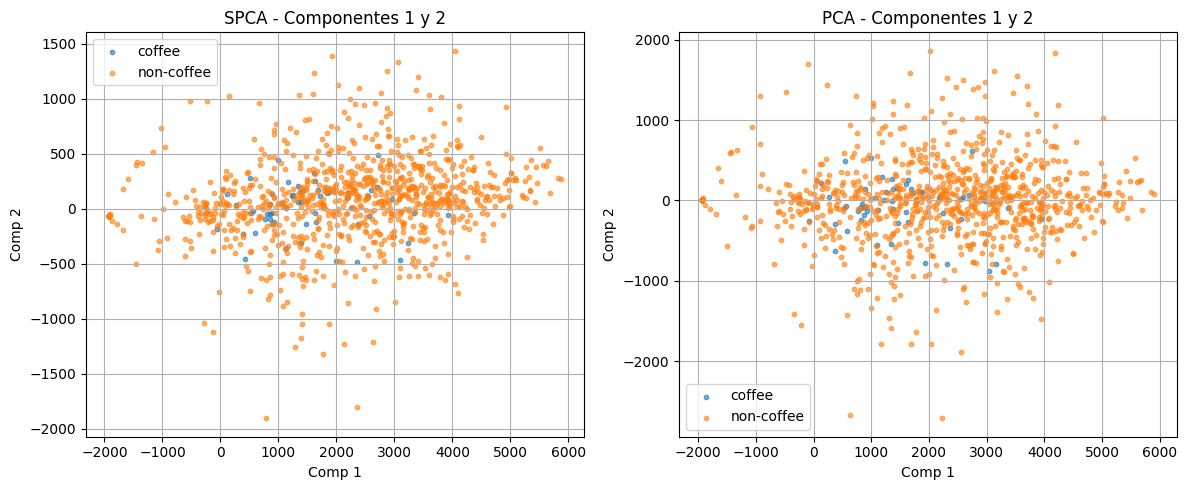

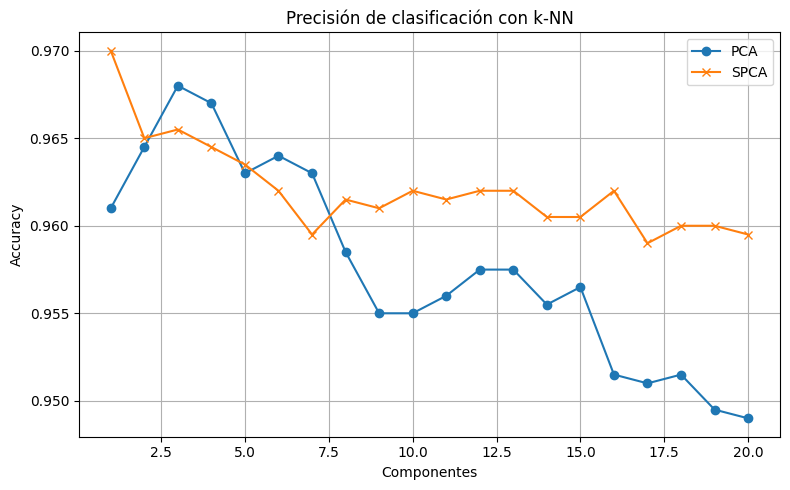

In [ ]:
# ============================================
# Notebook: SPCA + Clasificación optimizado para RAM
# ============================================
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import gc

# Ruta del dataset con subcarpetas "coffee" y "non-coffee"
dataset_path = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata"
data = load_files(dataset_path, load_content=False)
file_paths = np.array(data['filenames'])
y = np.array(data['target'])
label_names = data['target_names']

# =========================
# Usar solo una muestra (para RAM limitada)
# =========================
np.random.seed(42)
sample_idx = np.random.choice(len(file_paths), size=2000, replace=False)
file_paths = file_paths[sample_idx]
y = y[sample_idx]

# =========================
# Cargar y vectorizar imágenes (en escala de grises y más pequeñas)
# =========================
def load_images(file_list, size=(32, 32)):
    vectors = []
    for file in file_list:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, size)
        vectors.append(img.flatten())
    return np.array(vectors)

X = load_images(file_paths)
X_centered = X - np.mean(X, axis=0)

# =========================
# SPCA con HSIC
# =========================
n = X_centered.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
Ky = np.equal.outer(y, y).astype(float)
M_spca = X_centered.T @ H @ Ky @ H @ X_centered
vals, vecs = np.linalg.eigh(M_spca)
U_spca = vecs[:, np.argsort(vals)[::-1]]

# PCA estándar
pca = PCA()
pca.fit(X_centered)
U_pca = pca.components_.T

# =========================
# Visualización en 2D
# =========================
X_spca_2d = X_centered @ U_spca[:, :2]
X_pca_2d = X_centered @ U_pca[:, :2]

plt.figure(figsize=(12, 5))
for proj, title, data in zip([X_spca_2d, X_pca_2d], ["SPCA", "PCA"], [y, y]):
    plt.subplot(1, 2, 1 if title == "SPCA" else 2)
    for label in np.unique(data):
        idx = data == label
        plt.scatter(proj[idx, 0], proj[idx, 1], label=label_names[label], alpha=0.6, s=10)
    plt.title(f"{title} - Componentes 1 y 2")
    plt.xlabel("Comp 1")
    plt.ylabel("Comp 2")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Clasificación con k-NN (limitado a 10 componentes)
# =========================
scores_pca = []
scores_spca = []
components_range = range(1, 21)

for p in components_range:
    X_pca_proj = X_centered @ U_pca[:, :p]
    X_spca_proj = X_centered @ U_spca[:, :p]

    clf = KNeighborsClassifier(n_neighbors=3)
    scores_pca.append(cross_val_score(clf, X_pca_proj, y, cv=3).mean())
    scores_spca.append(cross_val_score(clf, X_spca_proj, y, cv=3).mean())

    # liberar memoria
    del X_pca_proj, X_spca_proj
    gc.collect()

plt.figure(figsize=(8, 5))
plt.plot(components_range, scores_pca, label="PCA", marker='o')
plt.plot(components_range, scores_spca, label="SPCA", marker='x')
plt.title("Precisión de clasificación con k-NN")
plt.xlabel("Componentes")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# SPCA y PCA, experimento 2

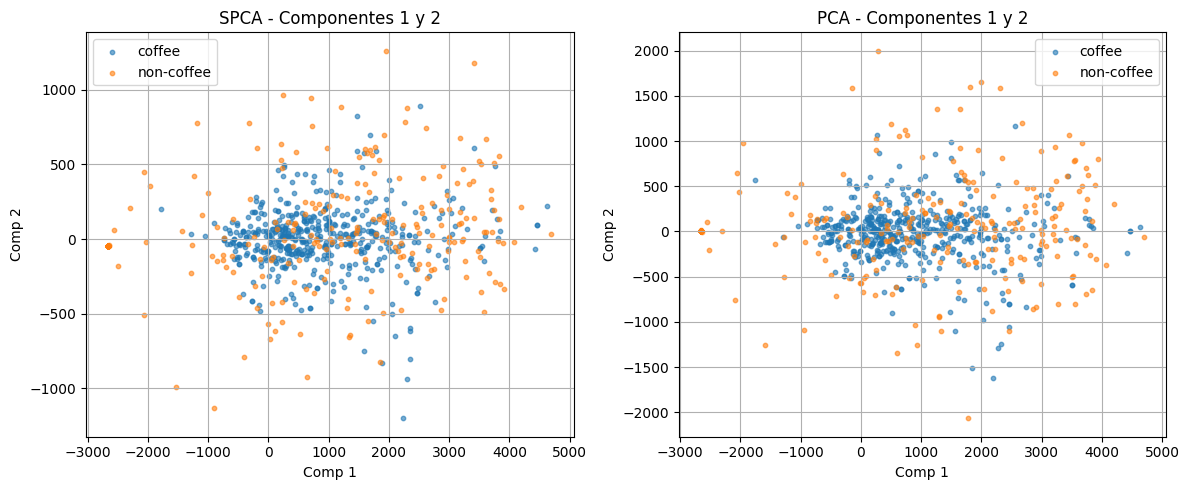

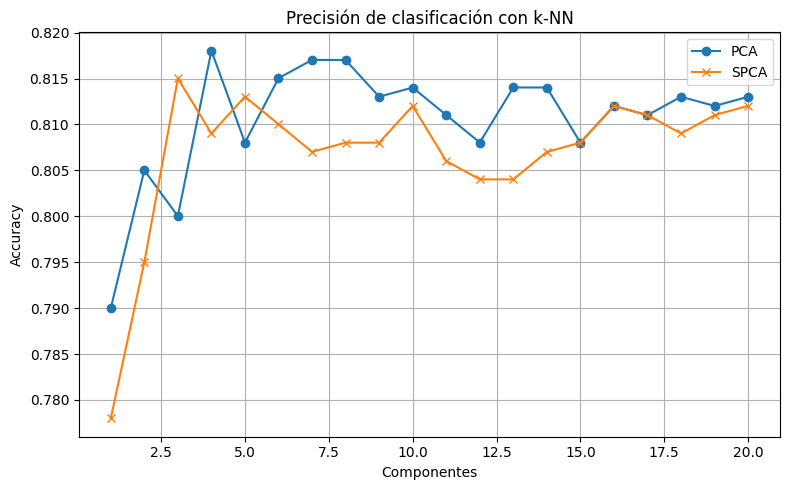

In [ ]:
# ============================================
# Notebook: SPCA + Clasificación optimizado para RAM
# ============================================
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import gc

# Ruta del dataset con subcarpetas "coffee" y "non-coffee"
dataset_path = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata"
data = load_files(dataset_path, load_content=False)
file_paths = np.array(data['filenames'])
y = np.array(data['target'])
label_names = data['target_names']

# =========================
# Balancear clases con submuestreo aleatorio
# =========================
from sklearn.utils import resample

# Encuentra los índices de cada clase
y = np.array(data['target'])
idx_coffee = np.where(y == 0)[0]
idx_noncoffee = np.where(y == 1)[0]

# Definir tamaño balanceado
n_samples = min(len(idx_coffee), len(idx_noncoffee), 500)  # máximo 500 por clase

# Submuestreo aleatorio por clase
idx_coffee_sampled = resample(idx_coffee, replace=False, n_samples=n_samples, random_state=42)
idx_noncoffee_sampled = resample(idx_noncoffee, replace=False, n_samples=n_samples, random_state=42)

# Combinar y aplicar
balanced_idx = np.concatenate([idx_coffee_sampled, idx_noncoffee_sampled])
file_paths = file_paths[balanced_idx]
y = y[balanced_idx]
# Cargar y vectorizar imágenes (en escala de grises y más pequeñas)
# =========================
def load_images(file_list, size=(32, 32)):
    vectors = []
    for file in file_list:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, size)
        vectors.append(img.flatten())
    return np.array(vectors)

X = load_images(file_paths)
X_centered = X - np.mean(X, axis=0)

# =========================
# SPCA con HSIC
# =========================
n = X_centered.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
Ky = np.equal.outer(y, y).astype(float)
M_spca = X_centered.T @ H @ Ky @ H @ X_centered
vals, vecs = np.linalg.eigh(M_spca)
U_spca = vecs[:, np.argsort(vals)[::-1]]

# PCA estándar
pca = PCA()
pca.fit(X_centered)
U_pca = pca.components_.T

# =========================
# Visualización en 2D
# =========================
X_spca_2d = X_centered @ U_spca[:, :2]
X_pca_2d = X_centered @ U_pca[:, :2]

plt.figure(figsize=(12, 5))
for proj, title, data in zip([X_spca_2d, X_pca_2d], ["SPCA", "PCA"], [y, y]):
    plt.subplot(1, 2, 1 if title == "SPCA" else 2)
    for label in np.unique(data):
        idx = data == label
        plt.scatter(proj[idx, 0], proj[idx, 1], label=label_names[label], alpha=0.6, s=10)
    plt.title(f"{title} - Componentes 1 y 2")
    plt.xlabel("Comp 1")
    plt.ylabel("Comp 2")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Clasificación con k-NN (limitado a 10 componentes)
# =========================
scores_pca = []
scores_spca = []
components_range = range(1, 21)

for p in components_range:
    X_pca_proj = X_centered @ U_pca[:, :p]
    X_spca_proj = X_centered @ U_spca[:, :p]

    clf = KNeighborsClassifier(n_neighbors=3)
    scores_pca.append(cross_val_score(clf, X_pca_proj, y, cv=3).mean())
    scores_spca.append(cross_val_score(clf, X_spca_proj, y, cv=3).mean())

    # liberar memoria
    del X_pca_proj, X_spca_proj
    gc.collect()

plt.figure(figsize=(8, 5))
plt.plot(components_range, scores_pca, label="PCA", marker='o')
plt.plot(components_range, scores_spca, label="SPCA", marker='x')
plt.title("Precisión de clasificación con k-NN")
plt.xlabel("Componentes")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-1101951573.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), max_samples_per_class), random_state=42))


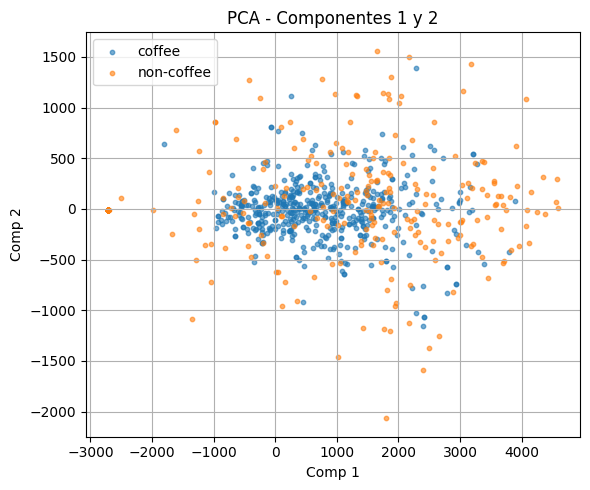

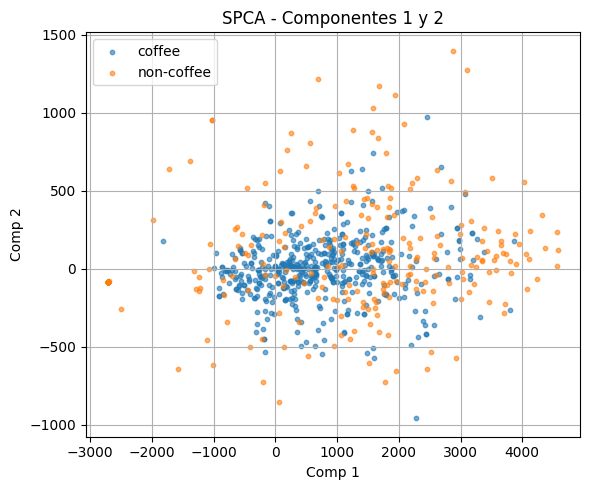

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# === CONFIGURACIÓN ===
csv_path = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata/metadata.csv"
img_base_path = "/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata"
image_size = (32, 32)
max_samples_per_class = 500  # balanceo

# === CARGAR CSV Y BALANCEAR ===
df = pd.read_csv(csv_path)

# Balancear manualmente
df_balanced = (
    df.groupby("class")
    .apply(lambda x: x.sample(min(len(x), max_samples_per_class), random_state=42))
    .reset_index(drop=True)
)

# Mapear clases a números
class_map = {name: i for i, name in enumerate(df_balanced['class'].unique())}
df_balanced["label"] = df_balanced["class"].map(class_map)

# === CARGAR IMÁGENES ===
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, image_size)
    return img.flatten()

X = np.array([
    load_image(f"{img_base_path}/{row['class']}/{row['filename']}")
    for _, row in df_balanced.iterrows()
])
y = df_balanced["label"].values

# === CENTRAR DATOS ===
X_centered = X - np.mean(X, axis=0)

# === PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

# === SPCA ===
def spca(X, y, n_components):
    n = X.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    Ky = np.equal.outer(y, y).astype(float)
    M = X.T @ H @ Ky @ H @ X
    eigvals, eigvecs = np.linalg.eigh(M)
    idx = np.argsort(eigvals)[::-1]
    return eigvecs[:, idx[:n_components]]

U_spca = spca(X_centered, y, n_components=2)
X_spca = X_centered @ U_spca

# === VISUALIZACIÓN ===
def plot_projection(X_proj, title):
    plt.figure(figsize=(6, 5))
    for label in np.unique(y):
        idx = y == label
        plt.scatter(X_proj[idx, 0], X_proj[idx, 1], label=list(class_map.keys())[label], s=10, alpha=0.6)
    plt.title(title)
    plt.xlabel("Comp 1")
    plt.ylabel("Comp 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_projection(X_pca, "PCA - Componentes 1 y 2")
plot_projection(X_spca, "SPCA - Componentes 1 y 2")


# SPCA y PCA, experimento 3

In [ ]:
# Paso 2: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from numpy.linalg import eigh


In [ ]:
# Paso 3: Cargar el CSV desde tu Drive (ajusta la ruta según corresponda)
file_path = '/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata/metadata.csv'
df = pd.read_csv(file_path)

In [ ]:
# Paso 4: Definir funciones necesarias para SPCA
def compute_H(n):
    return np.eye(n) - np.ones((n, n)) / n

def compute_Ky(y):
    encoder = OneHotEncoder(sparse=False)
    Y_onehot = encoder.fit_transform(y.reshape(-1, 1))
    return Y_onehot @ Y_onehot.T

def spca(X, y, n_components=None):
    d, n = X.shape
    H = compute_H(n)
    Ky = compute_Ky(y)
    S = X @ H @ Ky @ H @ X.T
    eigvals, eigvecs = eigh(S)
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    if n_components is not None:
        eigvecs = eigvecs[:, :n_components]
    return eigvecs


In [ ]:
# Paso 4: Definir funciones necesarias para SPCA
def compute_H(n):
    return np.eye(n) - np.ones((n, n)) / n

def compute_Ky(y):
    encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = encoder.fit_transform(y.reshape(-1, 1))
    return Y_onehot @ Y_onehot.T


def spca(X, y, n_components=None):
    d, n = X.shape
    H = compute_H(n)
    Ky = compute_Ky(y)
    S = X @ H @ Ky @ H @ X.T
    eigvals, eigvecs = eigh(S)
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    if n_components is not None:
        eigvecs = eigvecs[:, :n_components]
    return eigvecs


In [ ]:
# Paso 5: Preprocesamiento y muestreo
df_sample = df.sample(n=5000, random_state=42)

X_raw = df_sample[['x', 'y']].values.T  # Forma (d, n)
y = df_sample['class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw.T).T  # Estandarizar y transponer


In [ ]:
# Paso 6: Aplicar SPCA
U_spca = spca(X_scaled, y, n_components=2)
X_proj = U_spca.T @ X_scaled


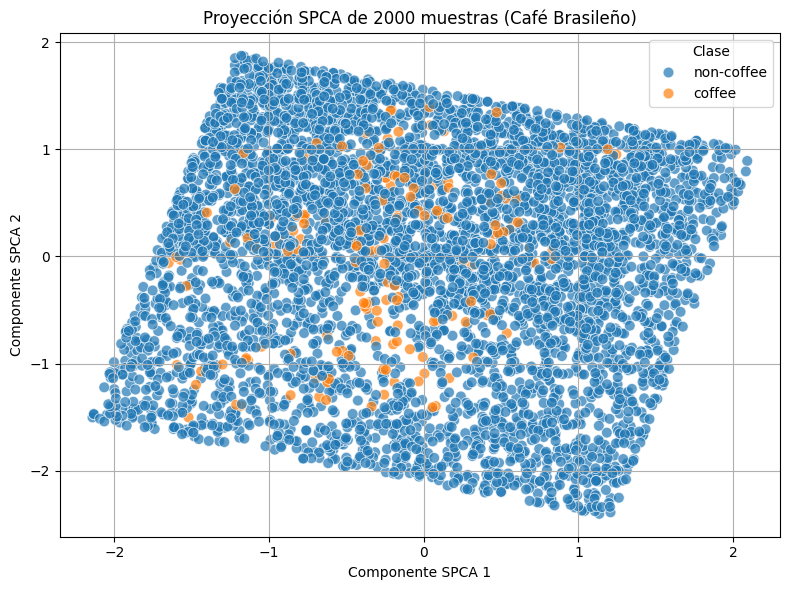

In [ ]:
# Paso 7: Visualización
df_proj = pd.DataFrame({
    'SPCA1': X_proj[0, :],
    'SPCA2': X_proj[1, :],
    'Class': y
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_proj, x='SPCA1', y='SPCA2', hue='Class', alpha=0.7, s=60)
plt.title('Proyección SPCA de 2000 muestras (Café Brasileño)')
plt.xlabel('Componente SPCA 1')
plt.ylabel('Componente SPCA 2')
plt.legend(title='Clase')
plt.grid(True)
plt.tight_layout()
plt.show()


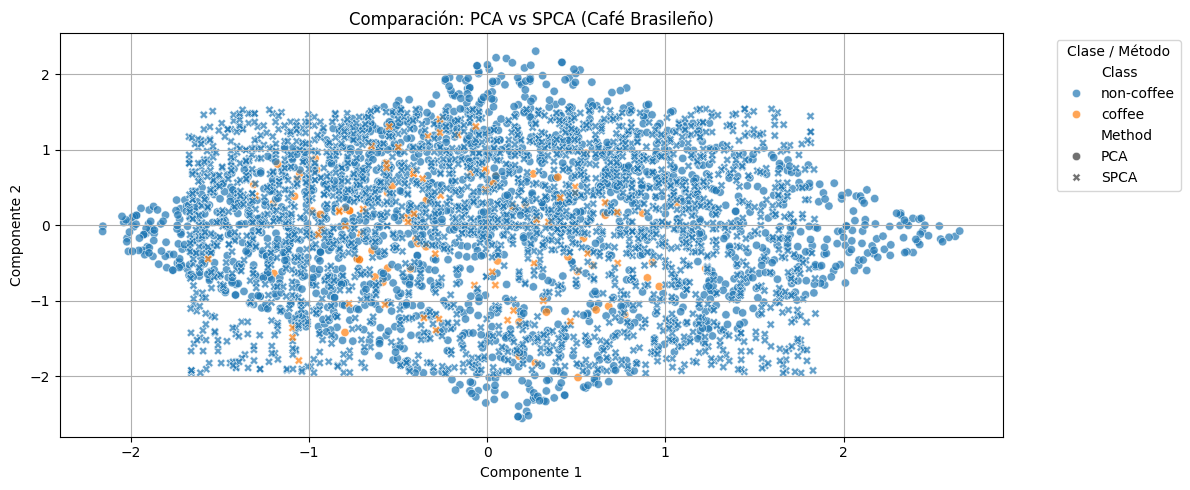

In [ ]:
# PCA vs SPCA con HSIC en Google Colab



## Paso 2: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from numpy.linalg import eigh

## Paso 3: Cargar los datos desde Drive
file_path = '/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata/metadata.csv'
df = pd.read_csv(file_path)

## Paso 4: Definir funciones SPCA con HSIC
def compute_H(n):
    return np.eye(n) - np.ones((n, n)) / n

def compute_Ky(y):
    encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = encoder.fit_transform(y.reshape(-1, 1))
    return Y_onehot @ Y_onehot.T

def spca(X, y, n_components=None):
    d, n = X.shape
    H = compute_H(n)
    Ky = compute_Ky(y)
    S = X @ H @ Ky @ H @ X.T
    eigvals, eigvecs = eigh(S)
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    if n_components is not None:
        eigvecs = eigvecs[:, :n_components]
    return eigvecs

## Paso 5: Preprocesamiento y muestreo
df_sample = df.sample(n=2000, random_state=42)
X_raw = df_sample[['x', 'y']].values
y_labels = df_sample['class'].values

# PCA
X_pca = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X_raw))

# SPCA
X_spca_raw = df_sample[['x', 'y']].values.T
X_scaled_spca = StandardScaler().fit_transform(X_spca_raw.T).T
U_spca = spca(X_scaled_spca, y_labels, n_components=2)
X_spca = (U_spca.T @ X_scaled_spca).T

## Paso 6: Visualización comparativa
df_compare = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'SPCA1': X_spca[:, 0],
    'SPCA2': X_spca[:, 1],
    'Class': y_labels
})

df_plot = pd.concat([
    df_compare[['PCA1', 'PCA2', 'Class']].rename(columns={'PCA1': 'Dim1', 'PCA2': 'Dim2'}).assign(Method='PCA'),
    df_compare[['SPCA1', 'SPCA2', 'Class']].rename(columns={'SPCA1': 'Dim1', 'SPCA2': 'Dim2'}).assign(Method='SPCA')
])

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_plot, x='Dim1', y='Dim2', hue='Class', style='Method', alpha=0.7)
plt.title('Comparación: PCA vs SPCA (Café Brasileño)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase / Método', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# SPCA y PCA, experimento 4

In [ ]:
# -------------------------------------------
# Celda 2: Cargar datos desde tu Drive
# -------------------------------------------
file_path = '/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata/metadata.csv'  # Cambia la ruta
df = pd.read_csv(file_path)
df_sample = df.sample(n=15000, random_state=42)


In [ ]:
# -------------------------------------------
# Celda 3: Funciones para SPCA con HSIC
# -------------------------------------------
def compute_H(n):
    return np.eye(n) - np.ones((n, n)) / n

def compute_Ky(y):
    encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = encoder.fit_transform(y.reshape(-1, 1))
    return Y_onehot @ Y_onehot.T

def spca(X, y, n_components=None):
    d, n = X.shape
    H = compute_H(n)
    Ky = compute_Ky(y)
    S = X @ H @ Ky @ H @ X.T
    eigvals, eigvecs = eigh(S)
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    if n_components is not None:
        eigvecs = eigvecs[:, :n_components]
    return eigvecs


In [ ]:
# -------------------------------------------
# Celda 4: Aplicar SPCA con 2 componentes
# -------------------------------------------
X_raw_spca = df_sample[['x', 'y']].values.T
y_spca = df_sample['class'].values
X_scaled_spca = StandardScaler().fit_transform(X_raw_spca.T).T
U_spca = spca(X_scaled_spca, y_spca, n_components=2)
X_proj_spca = (U_spca.T @ X_scaled_spca).T


In [ ]:
# -------------------------------------------
# Celda 5: Implementar PCA manual usando XXᵀ
# -------------------------------------------
X_raw_manual = df_sample[['x', 'y']].values.T
X_centered = X_raw_manual - X_raw_manual.mean(axis=1, keepdims=True)
cov_matrix = X_centered @ X_centered.T
eigvals_pca, eigvecs_pca = eigh(cov_matrix)
idx = np.argsort(eigvals_pca)[::-1]
eigvecs_pca = eigvecs_pca[:, idx]
U_pca_manual = eigvecs_pca[:, :2]
X_pca_manual = (U_pca_manual.T @ X_centered).T


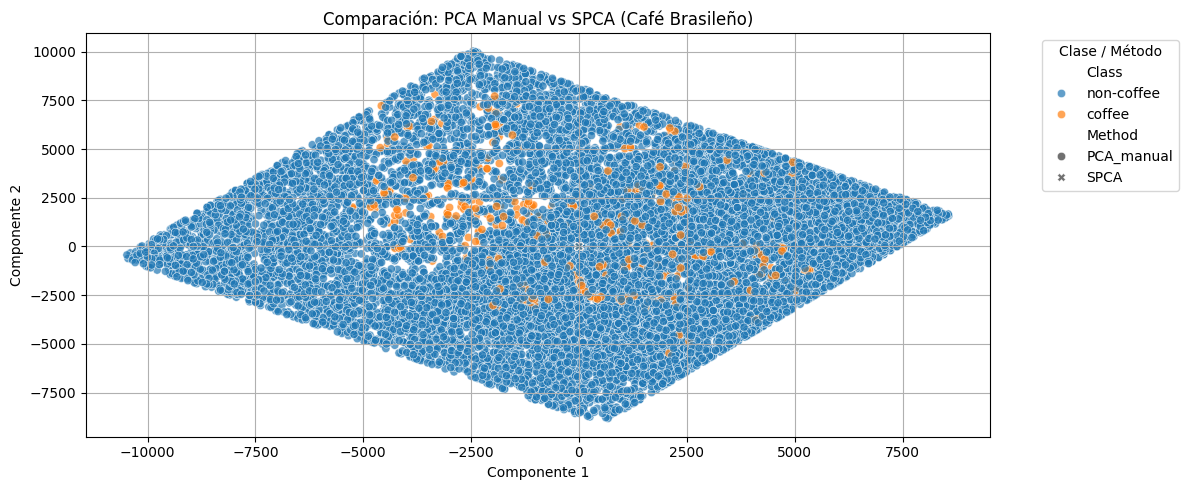

In [ ]:
# -------------------------------------------
# Celda 6: Comparación visual PCA vs SPCA
# -------------------------------------------
df_compare = pd.concat([
    pd.DataFrame({'Dim1': X_pca_manual[:, 0], 'Dim2': X_pca_manual[:, 1], 'Class': df_sample['class'].values, 'Method': 'PCA_manual'}),
    pd.DataFrame({'Dim1': X_proj_spca[:, 0], 'Dim2': X_proj_spca[:, 1], 'Class': df_sample['class'].values, 'Method': 'SPCA'})
])

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_compare, x='Dim1', y='Dim2', hue='Class', style='Method', alpha=0.7)
plt.title('Comparación: PCA Manual vs SPCA (Café Brasileño)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase / Método', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


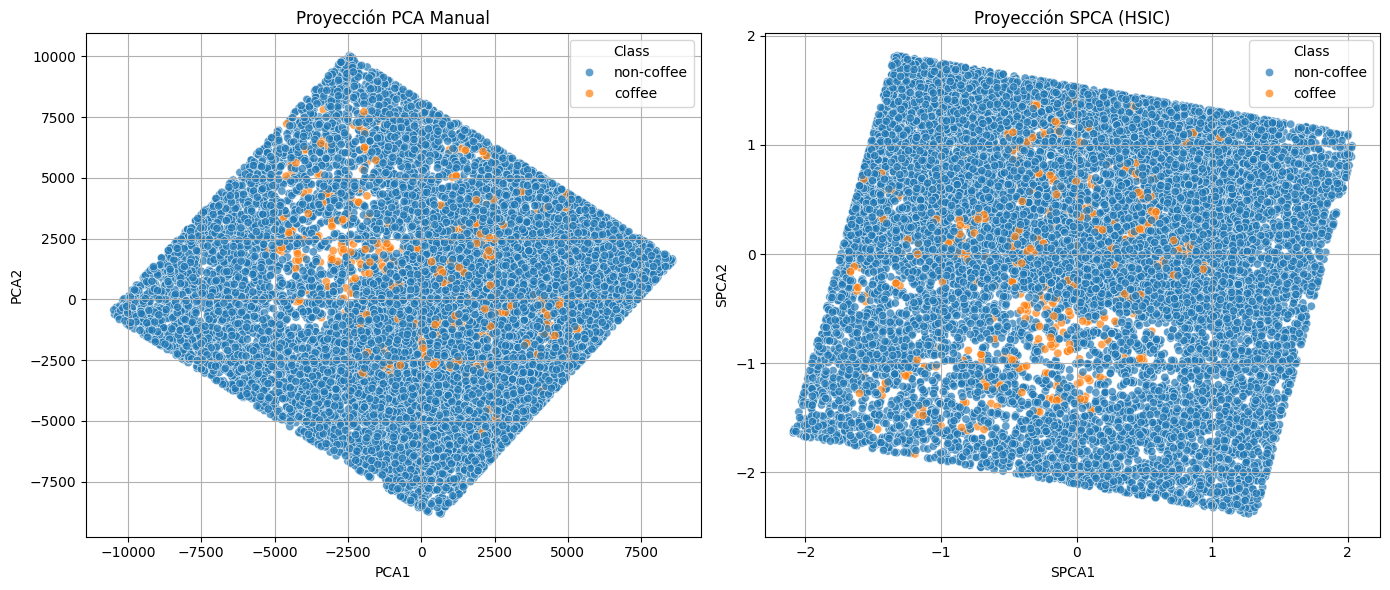

In [ ]:
# Asegurar que las matrices estén en forma (n_samples, 2)
X_pca_manual_fixed = X_pca_manual.T if X_pca_manual.shape[0] == 2 else X_pca_manual
X_proj_spca_fixed = X_proj_spca.T if X_proj_spca.shape[0] == 2 else X_proj_spca

# Crear DataFrames
df_pca = pd.DataFrame(X_pca_manual_fixed, columns=['PCA1', 'PCA2'])
df_spca = pd.DataFrame(X_proj_spca_fixed, columns=['SPCA1', 'SPCA2'])
df_pca['Class'] = df_sample['class'].values
df_spca['Class'] = df_sample['class'].values

# Gráficas separadas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Class', ax=axes[0], alpha=0.7)
axes[0].set_title("Proyección PCA Manual")
axes[0].grid(True)

sns.scatterplot(data=df_spca, x='SPCA1', y='SPCA2', hue='Class', ax=axes[1], alpha=0.7)
axes[1].set_title("Proyección SPCA (HSIC)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Clasficador KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Convertir clases a valores numéricos si es necesario
le = LabelEncoder()
y_encoded = le.fit_transform(df_sample['class'].values)

# Asegurar forma (n_samples, 2)
X_pca_for_clf = X_pca_manual.T if X_pca_manual.shape[0] == 2 else X_pca_manual
X_spca_for_clf = X_proj_spca.T if X_proj_spca.shape[0] == 2 else X_proj_spca

# Clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Evaluación con validación cruzada
score_pca = cross_val_score(knn, X_pca_for_clf, y_encoded, cv=5).mean()
score_spca = cross_val_score(knn, X_spca_for_clf, y_encoded, cv=5).mean()

# Mostrar resultados
print(f"Precisión promedio con KNN (PCA):  {score_pca:.4f}")
print(f"Precisión promedio con KNN (SPCA): {score_spca:.4f}")


Precisión promedio con KNN (PCA):  0.9692
Precisión promedio con KNN (SPCA): 0.9693


Precisión promedio con KNN (PCA):  0.9692
Precisión promedio con KNN (SPCA): 0.9693


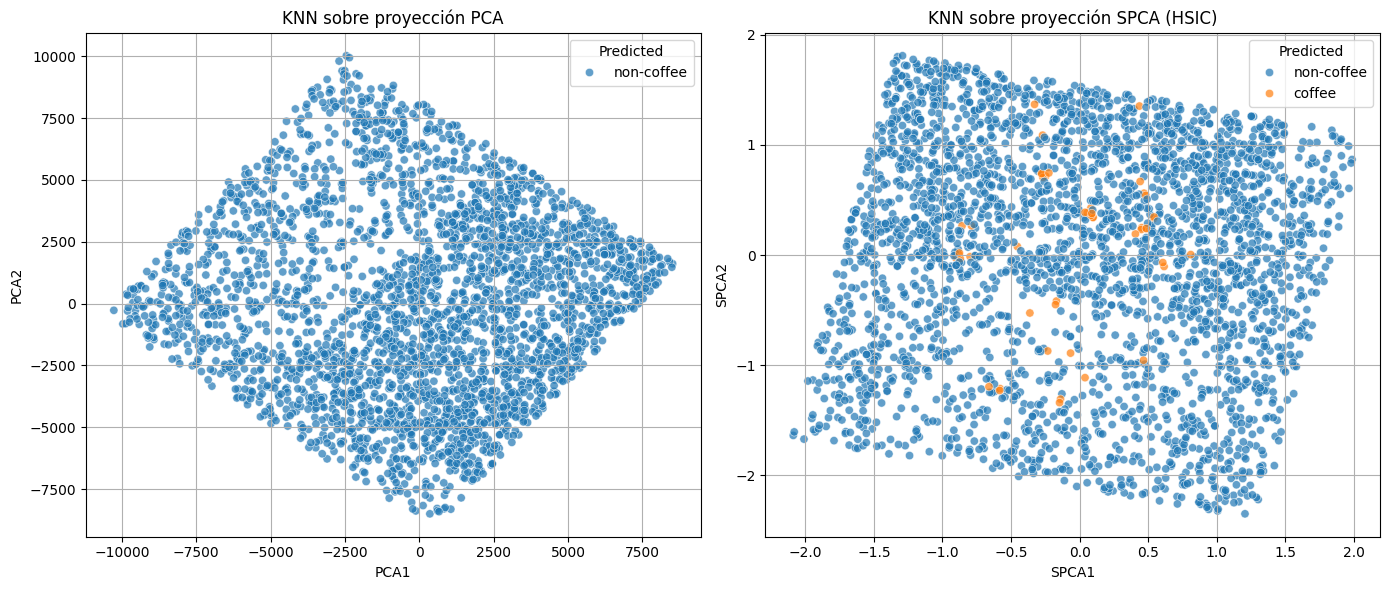

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir clases a valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(df_sample['class'].values)

# Asegurar forma (n_samples, 2)
X_pca_for_clf = X_pca_manual.T if X_pca_manual.shape[0] == 2 else X_pca_manual
X_spca_for_clf = X_proj_spca.T if X_proj_spca.shape[0] == 2 else X_proj_spca

# Clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Validación cruzada
score_pca = cross_val_score(knn, X_pca_for_clf, y_encoded, cv=5).mean()
score_spca = cross_val_score(knn, X_spca_for_clf, y_encoded, cv=5).mean()

print(f"Precisión promedio con KNN (PCA):  {score_pca:.4f}")
print(f"Precisión promedio con KNN (SPCA): {score_spca:.4f}")

# División para visualización de predicciones
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca_for_clf, y_encoded, test_size=0.2, random_state=42)
X_spca_train, X_spca_test, _, _ = train_test_split(X_spca_for_clf, y_encoded, test_size=0.2, random_state=42)

# Entrenar modelos para graficar
knn_pca = knn.fit(X_pca_train, y_train)
knn_spca = knn.fit(X_spca_train, y_train)

# Predicciones
y_pred_pca = knn_pca.predict(X_pca_test)
y_pred_spca = knn_spca.predict(X_spca_test)

# Crear DataFrames para visualización
df_pred_pca = pd.DataFrame(X_pca_test, columns=["PCA1", "PCA2"])
df_pred_pca["Predicted"] = le.inverse_transform(y_pred_pca)

df_pred_spca = pd.DataFrame(X_spca_test, columns=["SPCA1", "SPCA2"])
df_pred_spca["Predicted"] = le.inverse_transform(y_pred_spca)

# Graficar predicciones
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pred_pca, x="PCA1", y="PCA2", hue="Predicted", ax=axes[0], alpha=0.7)
axes[0].set_title("KNN sobre proyección PCA")
axes[0].grid(True)

sns.scatterplot(data=df_pred_spca, x="SPCA1", y="SPCA2", hue="Predicted", ax=axes[1], alpha=0.7)
axes[1].set_title("KNN sobre proyección SPCA (HSIC)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Claficador con LDA

=== Clasificación con LDA sobre PCA ===
              precision    recall  f1-score   support

      coffee       0.00      0.00      0.00        95
  non-coffee       0.97      1.00      0.98      2905

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000


=== Clasificación con LDA sobre SPCA ===
              precision    recall  f1-score   support

      coffee       0.00      0.00      0.00        95
  non-coffee       0.97      1.00      0.98      2905

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

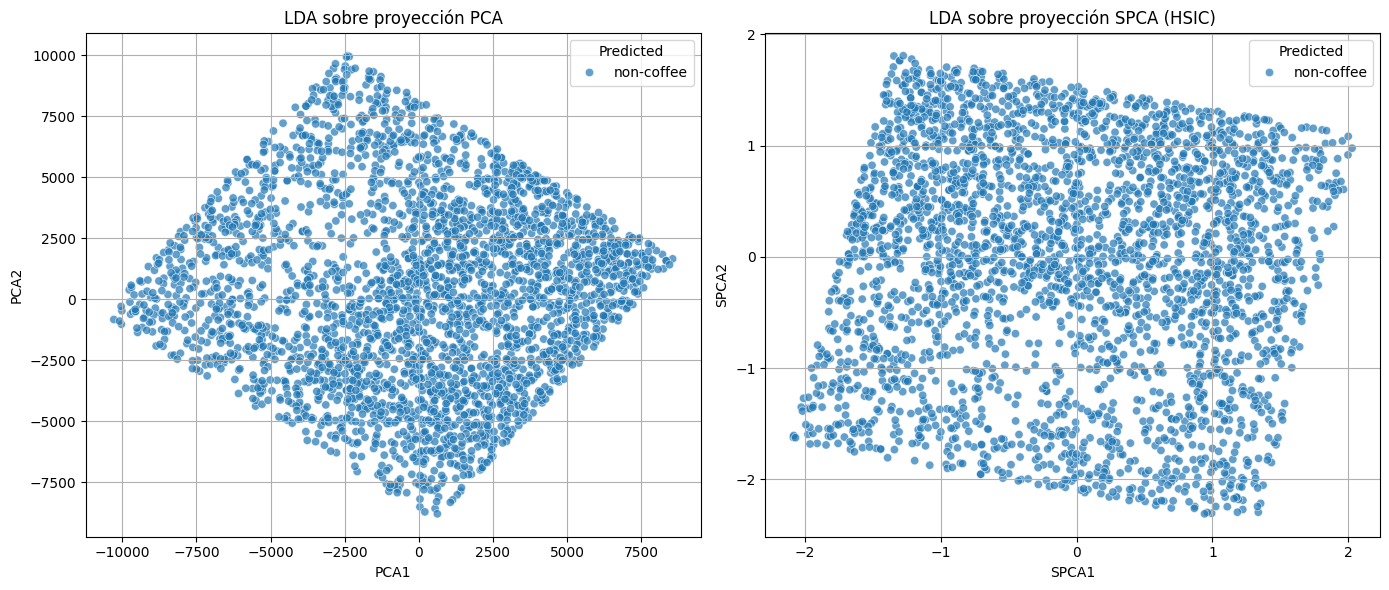

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar forma (n_samples, 2)
X_pca_for_clf = X_pca_manual.T if X_pca_manual.shape[0] == 2 else X_pca_manual
X_spca_for_clf = X_proj_spca.T if X_proj_spca.shape[0] == 2 else X_proj_spca

# Separar entrenamiento/prueba con estratificación
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca_for_clf, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

X_spca_train, X_spca_test, _, _ = train_test_split(
    X_spca_for_clf, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Entrenar clasificadores LDA
lda_pca = LinearDiscriminantAnalysis().fit(X_pca_train, y_train)
lda_spca = LinearDiscriminantAnalysis().fit(X_spca_train, y_train)

# Predicciones
y_pred_pca = lda_pca.predict(X_pca_test)
y_pred_spca = lda_spca.predict(X_spca_test)

# Reportes
print("=== Clasificación con LDA sobre PCA ===")
print(classification_report(y_test, y_pred_pca, target_names=le.classes_))

print("\n=== Clasificación con LDA sobre SPCA ===")
print(classification_report(y_test, y_pred_spca, target_names=le.classes_))

# Crear DataFrames para visualización
df_lda_pca = pd.DataFrame(X_pca_test, columns=["PCA1", "PCA2"])
df_lda_pca["Predicted"] = le.inverse_transform(y_pred_pca)

df_lda_spca = pd.DataFrame(X_spca_test, columns=["SPCA1", "SPCA2"])
df_lda_spca["Predicted"] = le.inverse_transform(y_pred_spca)

# Graficar predicciones
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_lda_pca, x="PCA1", y="PCA2", hue="Predicted", ax=axes[0], alpha=0.7)
axes[0].set_title("LDA sobre proyección PCA")
axes[0].grid(True)

sns.scatterplot(data=df_lda_spca, x="SPCA1", y="SPCA2", hue="Predicted", ax=axes[1], alpha=0.7)
axes[1].set_title("LDA sobre proyección SPCA (HSIC)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


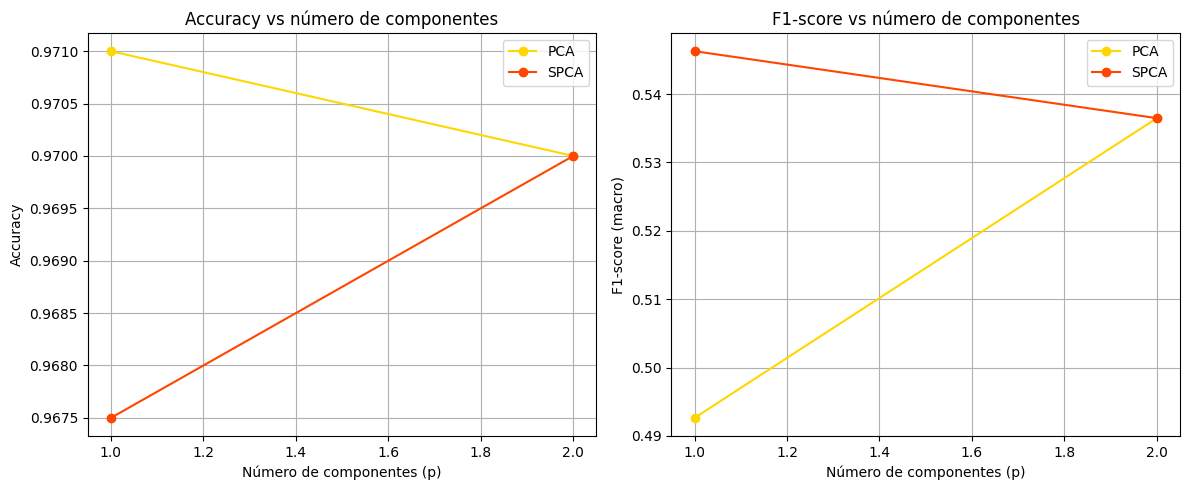

In [ ]:
# === Librerías necesarias ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from numpy.linalg import eigh
import matplotlib.pyplot as plt

# === Funciones SPCA ===
def compute_H(n):
    return np.eye(n) - np.ones((n, n)) / n

def compute_Ky(y):
    encoder = OneHotEncoder(sparse_output=False)  # usar sparse para compatibilidad
    Y_onehot = encoder.fit_transform(y.reshape(-1, 1))
    return Y_onehot @ Y_onehot.T

def spca(X, y, n_components):
    d, n = X.shape
    H = compute_H(n)
    Ky = compute_Ky(y)
    S = X @ H @ Ky @ H @ X.T
    eigvals, eigvecs = eigh(S)
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    return eigvecs[:, :n_components]

# === Cargar dataset ===
file_path = '/content/drive/MyDrive/3er cuatrimestre/ML/colabs/Data_hw4/dataset_with_metadata/metadata.csv'  # Ajusta la ruta
df = pd.read_csv(file_path)
df_sample = df.sample(n=2000, random_state=42)

# === Preparar X y y ===
X = df_sample[['x', 'y']].values.T  # (d, n)
X_scaled = StandardScaler().fit_transform(X.T).T
y_raw = df_sample['class'].values
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)

# === Rango de componentes a probar ===
p_values = [1, 2]  # como solo hay 2 features

# === Resultados a almacenar ===
accuracy_pca = []
accuracy_spca = []
f1_pca = []
f1_spca = []

# === Evaluar cada valor de p ===
for p in p_values:
    # --- PCA manual ---
    X_centered = X - X.mean(axis=1, keepdims=True)
    S_pca = X_centered @ X_centered.T
    eigvals, eigvecs = eigh(S_pca)
    idx = np.argsort(eigvals)[::-1]
    U_pca = eigvecs[:, idx[:p]]
    X_proj_pca = (U_pca.T @ X).T

    # --- SPCA ---
    U_spca = spca(X, y_encoded, n_components=p)
    X_proj_spca = (U_spca.T @ X).T

    # --- Clasificador ---
    knn = KNeighborsClassifier(n_neighbors=5)

    # PCA scores
    acc_pca = cross_val_score(knn, X_proj_pca, y_encoded, cv=5, scoring='accuracy').mean()
    f1_pca_val = cross_val_score(knn, X_proj_pca, y_encoded, cv=5, scoring=make_scorer(f1_score, average='macro')).mean()

    # SPCA scores
    acc_spca = cross_val_score(knn, X_proj_spca, y_encoded, cv=5, scoring='accuracy').mean()
    f1_spca_val = cross_val_score(knn, X_proj_spca, y_encoded, cv=5, scoring=make_scorer(f1_score, average='macro')).mean()

    # Guardar
    accuracy_pca.append(acc_pca)
    f1_pca.append(f1_pca_val)
    accuracy_spca.append(acc_spca)
    f1_spca.append(f1_spca_val)

# === Graficar resultados ===
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(p_values, accuracy_pca, label='PCA', marker='o', color='gold')
plt.plot(p_values, accuracy_spca, label='SPCA', marker='o', color='orangered')
plt.title("Accuracy vs número de componentes")
plt.xlabel("Número de componentes (p)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# F1-score
plt.subplot(1, 2, 2)
plt.plot(p_values, f1_pca, label='PCA', marker='o', color='gold')
plt.plot(p_values, f1_spca, label='SPCA', marker='o', color='orangered')
plt.title("F1-score vs número de componentes")
plt.xlabel("Número de componentes (p)")
plt.ylabel("F1-score (macro)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
